# Comparison of Individual, Bagging and Boosting Algorithms

# Diamond Dataset Features

In this section, we outline the features of the diamond dataset used for analysis.

## Selected Features

The features included in the dataset are:

- **carat**: Weight of the diamond (measured in carats)
- **cut**: Quality of the cut (e.g., Fair, Good, Very Good, Ideal, Premium) *(Target Variable)*
- **color**: Diamond color, from J (worst) to D (best)
- **clarity**: A measurement of how clear the diamond is (e.g., IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1)
- **depth**: Total depth percentage, calculated as \( \frac{z}{\text{mean}(x, y)} \)
- **table**: Width of the top of the diamond relative to the widest point
- **price**: Price of the diamond (in US dollars)
- **x**: Length of the diamond (in mm)
- **y**: Width of the diamond (in mm)
- **z**: Depth of the diamond (in mm)

## Target Variable

The target variable for prediction is:
- **cut**: This is the target variable we aim to predict using the selected features.


In [1]:
# !pip install xgboost -q

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# import the data
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **DecisionTreeClassifier**

### **Accuracy score:  0.70**

In [7]:
# %%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.71431219873934
Precision score:  0.71431219873934
Recall score:  0.71431219873934
F1 score:  0.71431219873934


## **RandomForestClassifier**

### **Accuracy score:  0.78**

In [8]:
# %%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7902298850574713
Precision score:  0.7902298850574713
Recall score:  0.7902298850574713
F1 score:  0.7902298850574713


## **XGBClassifier**

### **Accuracy score:  0.79**

In [9]:
# %%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.8046903967371153
Precision score:  0.8046903967371153
Recall score:  0.8046903967371153
F1 score:  0.8046903967371153


### **Comparison**

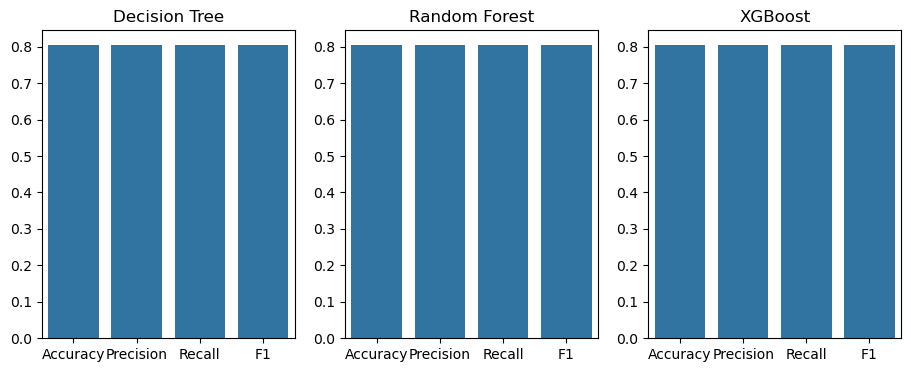

In [10]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

In [11]:
from sklearn.ensemble import BaggingClassifier

# Create a Bagging classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the Bagging classifier
bagging.fit(X_train, y_train)

# Predict the test data
y_pred_bagging = bagging.predict(X_test)

# Print the evaluation metrics
print('Accuracy score: ', accuracy_score(y_test, y_pred_bagging))
print('Precision score: ', precision_score(y_test, y_pred_bagging, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred_bagging, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred_bagging, average='micro'))

Accuracy score:  0.7904152762328513
Precision score:  0.7904152762328513
Recall score:  0.7904152762328513
F1 score:  0.7904152762328513
